In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 准备数据集
def prepare_dataset(sample_num,data_type,noise_amplitude):
    '''prepare special kinds of dataset,
        params:
        sample_num: sample numbers in this prepared dataset,
        data_type: must be one of ['rose','spiral','hypotrochoid'],
        noise_amplitude: how much noise add to the dataset. 
            normally, range from 0-0.5
        return:
        the prepared dataset in numpy.ndarray format
    '''
    def add_noise(x, y, amplitude):
        X = np.concatenate((x, y))
        X += amplitude * np.random.randn(2, X.shape[1])
        return X.T
    
    def get_spiral(t, noise_amplitude=0.5):
        r = t
        x = r * np.cos(t)
        y = r * np.sin(t)
        return add_noise(x, y, noise_amplitude)
    
    def get_rose(t, noise_amplitude=0.02):
        k = 5       
        r = np.cos(k*t) + 0.25 
        x = r * np.cos(t)
        y = r * np.sin(t)
        return add_noise(x, y, noise_amplitude)

    def get_hypotrochoid(t, noise_amplitude=0):
        a, b, h = 10.0, 2.0, 4.0
        x = (a - b) * np.cos(t) + h * np.cos((a - b) / b * t) 
        y = (a - b) * np.sin(t) - h * np.sin((a - b) / b * t) 
        return add_noise(x, y, 0)

    X=2.5*np.pi*(1+2*np.random.rand(1,sample_num))
    if data_type=='hypotrochoid':
        return get_hypotrochoid(X,noise_amplitude)
    elif data_type=='spiral':
        return get_spiral(X,noise_amplitude)
    else:
        return get_rose(X,noise_amplitude)
    

In [3]:
spiral_dataset=prepare_dataset(600,'spiral',0.5)
rose_dataset=prepare_dataset(600,'rose',0.02)
hypo_dataset=prepare_dataset(600,'hypotrochoid',0)


In [4]:
# 无标签数据集可视化，将第一列feature作为X，第二列feature作为y
def visual_2D_dataset_dist(dataset,title):
    '''将二维数据集dataset显示在散点图中'''
    assert dataset.shape[1]==2,'only support dataset with 2 features'
    plt.figure()
    X=dataset[:,0]
    Y=dataset[:,1]
    plt.scatter(X,Y,marker='v',c='g',label='dataset')
    
    X_min,X_max=np.min(X)-1,np.max(X)+1
    Y_min,Y_max=np.min(Y)-1,np.max(Y)+1
    plt.title(title)
    plt.xlim(X_min,X_max)
    plt.ylim(Y_min,Y_max)
    plt.xlabel('feature_0')
    plt.ylabel('feature_1')
    plt.legend()

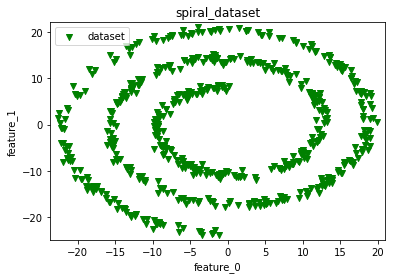

In [5]:
visual_2D_dataset_dist(spiral_dataset,'spiral_dataset')

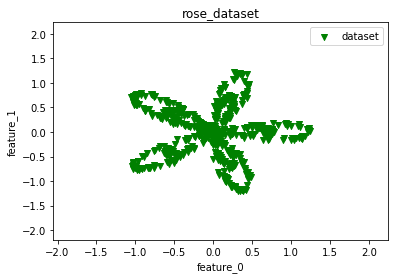

In [6]:
visual_2D_dataset_dist(rose_dataset,'rose_dataset')

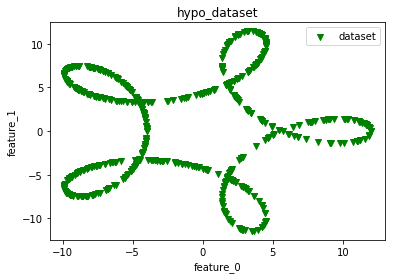

In [7]:
visual_2D_dataset_dist(hypo_dataset,'hypo_dataset')

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# 建立一个函数，用来构建聚类模型，并绘图展示聚类效果
def perform_plot_clustering(dataset,none_cluster_num=3,kneighbors_num=10):
    assert dataset.shape[1]==2,'only support dataset with 2 features'
    
    # 构建凝聚层次聚类模型，并用数据集对其进行训练
    none_model=AgglomerativeClustering(n_clusters=none_cluster_num)
    none_model.fit(dataset) # 构建无connectivity的model
    
    connectivity = kneighbors_graph(dataset, kneighbors_num, 
                                    include_self=False)
    conn_model=AgglomerativeClustering(n_clusters=kneighbors_num,
                                       connectivity=connectivity)
    conn_model.fit(dataset)# 构建kneighbors_graph connectivity的model
    
    def visual_2D_dataset(plt,dataset_X,dataset_y):
        '''将二维数据集dataset_X和对应的类别dataset_y显示在散点图中'''
        assert dataset_X.shape[1]==2,'only support dataset with 2 features'
        classes=list(set(dataset_y)) 
        markers=['.',',','o','v','^','<','>','1','2','3','4','8'
                 ,'s','p','*','h','H','+','x','D','d','|']
        # colors=['b','c','g','k','m','w','r','y']
        colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
                'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
        for class_id in classes:
            one_class=np.array([feature for (feature,label) in 
                       zip(dataset_X,dataset_y) if label==class_id])
            plt.scatter(one_class[:,0],one_class[:,1],marker=markers[class_id%len(markers)],
                        c=colors[class_id%len(colors)],label='class_'+str(class_id))
        plt.legend()
        
    # 以下是绘图
    def plot_model_graph(plt,model,title):
        labels=model.labels_
        # 将数据集绘制到图表中
        visual_2D_dataset(plt,dataset,labels)
        plt.title(title)
        plt.xlabel('feature_0')
        plt.ylabel('feature_1')
        return plt
    
    plt.figure(12,figsize=(25,10))
    plt.subplot(121)
    plot_model_graph(plt,none_model,'none_connectivity')
    
    plt.subplot(122)
    plot_model_graph(plt,conn_model,'kneighbors_connectivity')
    plt.show()

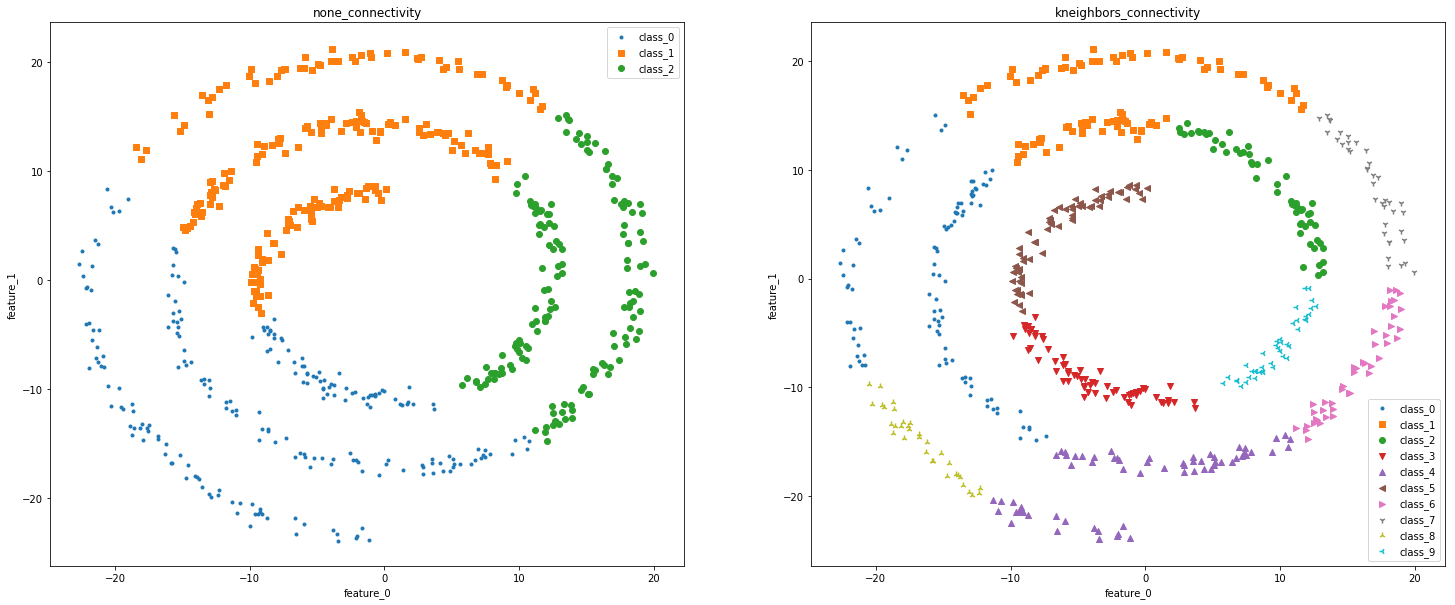

In [9]:
perform_plot_clustering(spiral_dataset)

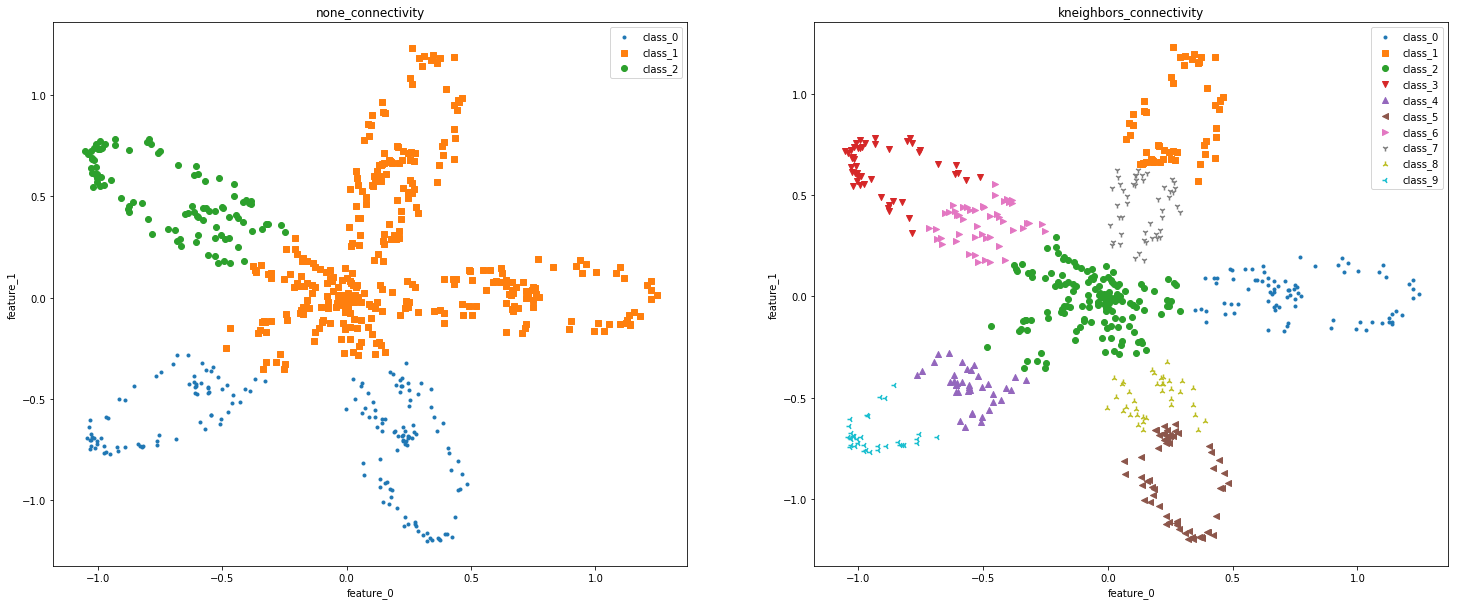

In [10]:
perform_plot_clustering(rose_dataset)

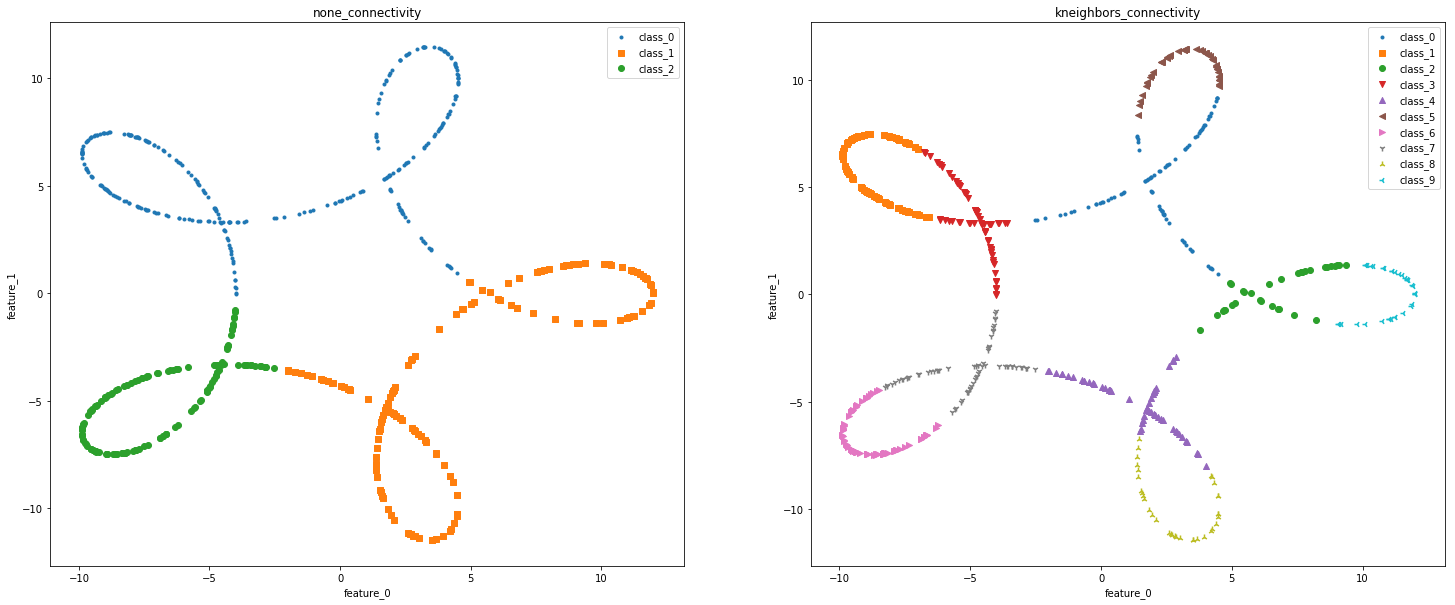

In [11]:
perform_plot_clustering(hypo_dataset)

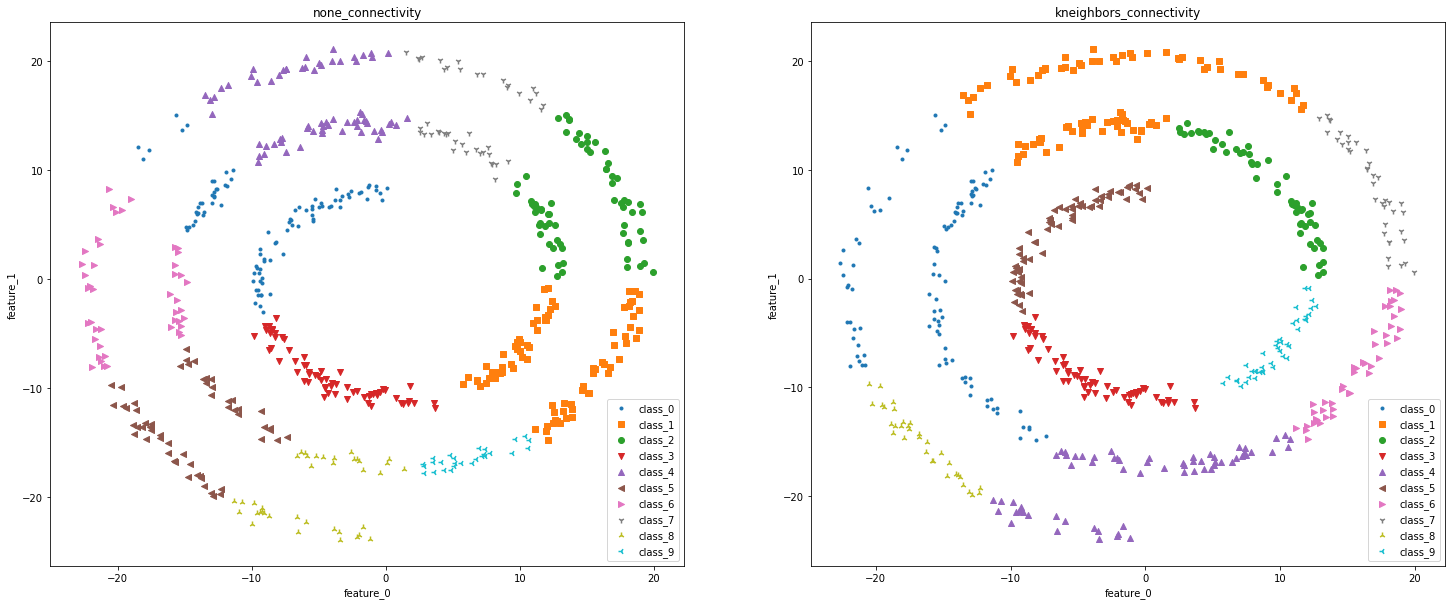

In [12]:
perform_plot_clustering(spiral_dataset,none_cluster_num=10,kneighbors_num=10)

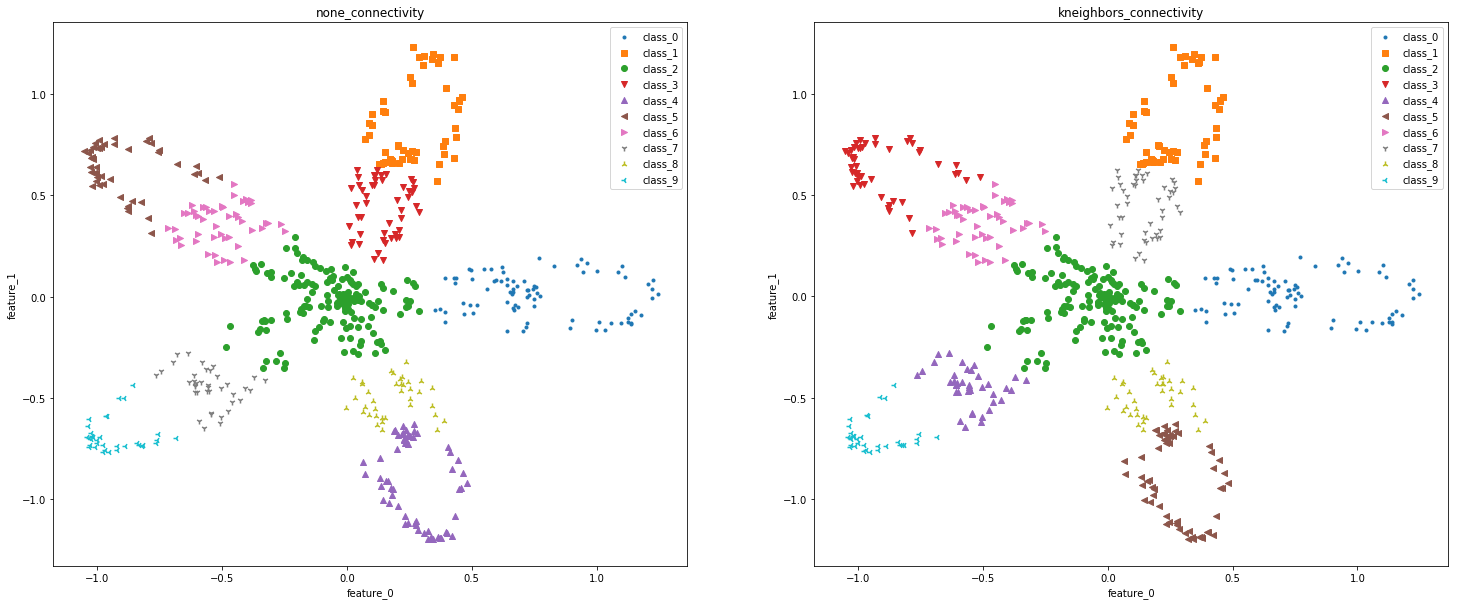

In [13]:
perform_plot_clustering(rose_dataset,none_cluster_num=10,kneighbors_num=10)

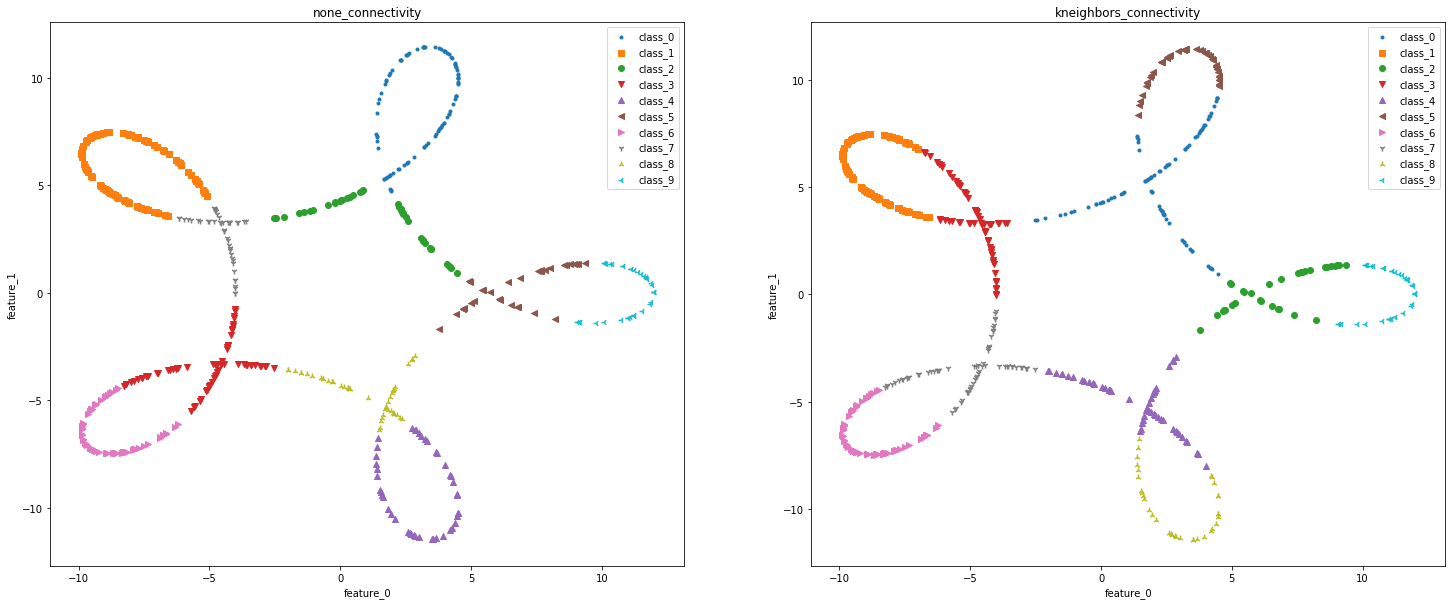

In [14]:
perform_plot_clustering(hypo_dataset,none_cluster_num=10,kneighbors_num=10)